<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning1/blob/main/RidgeEffect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge


In [ ]:
X,y=load_diabetes(return_X_y=True)
feature_names = load_diabetes().feature_names
data=load_diabetes()

In [ ]:
df = pd.DataFrame(X, columns=feature_names)
df['target']=y

In [ ]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=4)

In [ ]:
alpha=[0,10,100,1000]
coef=[]
r2score=[]
for i in alpha:
    reg=Ridge(alpha=i)
    reg.fit(X_train, y_train)
    y_pred=reg.predict(X_test)
    r2score.append(r2_score(y_test, y_pred))
    coef.append(reg.coef_)

In [ ]:
print(r2score)
print("\n")
print(reg.coef_)

[0.46109889928420855, 0.1586550730031001, 0.021143519874270544, 0.00117967038815181]


[ 0.27074908  0.02969139  0.75403194  0.6128247   0.28758425  0.21738454
 -0.50783679  0.57518998  0.76859663  0.46809114]


Text(0.5, 1.0, 'Alpha=0 , r2-score 0.46109889928420855')

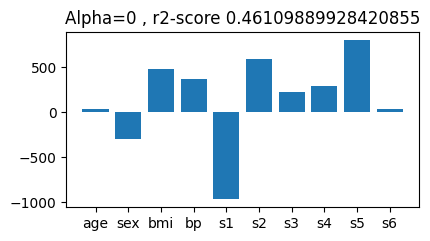

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.bar(feature_names,coef[0])
plt.title("Alpha=0 , r2-score {}".format(r2score[0]))

Text(0.5, 1.0, 'Alpha=10 , r2-score 0.1586550730031001')

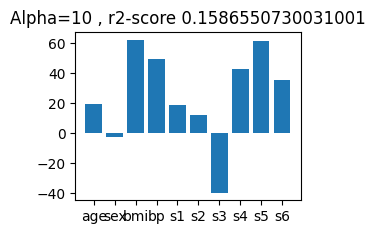

In [ ]:
plt.subplot(222)
plt.bar(feature_names,coef[1])
plt.title("Alpha=10 , r2-score {}".format(r2score[1]))

Text(0.5, 1.0, 'Alpha=100 , r2-score 0.021143519874270544')

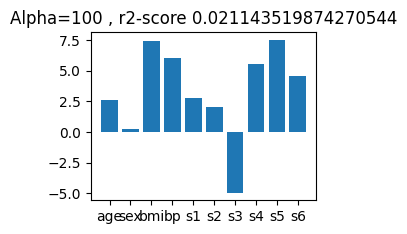

In [ ]:
plt.subplot(223)
plt.bar(feature_names,coef[2])
plt.title("Alpha=100 , r2-score {}".format(r2score[2]))

Text(0.5, 1.0, 'Alpha=1000 , r2-score 0.00117967038815181')

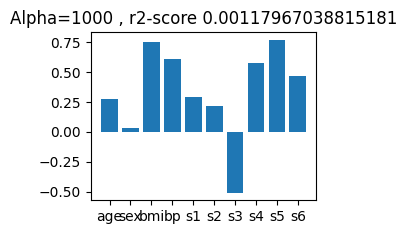

In [ ]:
plt.subplot(224)
plt.bar(feature_names,coef[3])
plt.title("Alpha=1000 , r2-score {}".format(r2score[3]))

italicised text# **Higher coefficient are more affeted**

In [ ]:
alpha=[0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coef=[]

for i in alpha:
    reg=Ridge(alpha=i)
    reg.fit(X_train, y_train)
    y_pred=reg.predict(X_test)
    coef.append(reg.coef_)

In [ ]:
input_appar=np.array(coef)

In [ ]:
codf = pd.DataFrame(input_appar, columns=feature_names)


In [ ]:
codf['alpha']=alpha
codf.set_index("alpha")

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,33.409541,-292.241128,481.080028,369.057161,-966.324639,589.771093,232.598259,288.321647,802.699016,37.813458
0.0001,33.534005,-292.090057,481.233885,368.950642,-953.554577,579.877923,226.710673,286.352989,797.886426,37.773355
0.0010,34.521932,-290.840835,482.401823,368.067875,-852.448721,501.591614,180.111149,270.763353,759.735356,37.491364
0.0100,38.872214,-282.998910,485.047982,362.441022,-419.230221,168.110313,-18.843458,203.843171,594.026885,37.923140
0.1000,44.020634,-241.693300,452.986653,332.044202,-76.336867,-68.521438,-164.988091,149.969081,431.613474,58.518627
1.0000,48.812612,-85.494310,270.226405,201.916048,17.413481,-19.043075,-136.477357,122.265171,247.598463,95.598797
10.0000,19.738169,-2.316503,62.159294,49.546029,18.927164,12.457396,-39.600912,42.819789,61.571158,35.247315
100.0000,2.621511,0.232384,7.390668,5.994492,2.758341,2.061751,-4.949711,5.580060,7.510500,4.547236
1000.0000,0.270749,0.029691,0.754032,0.612825,0.287584,0.217385,-0.507837,0.575190,0.768597,0.468091


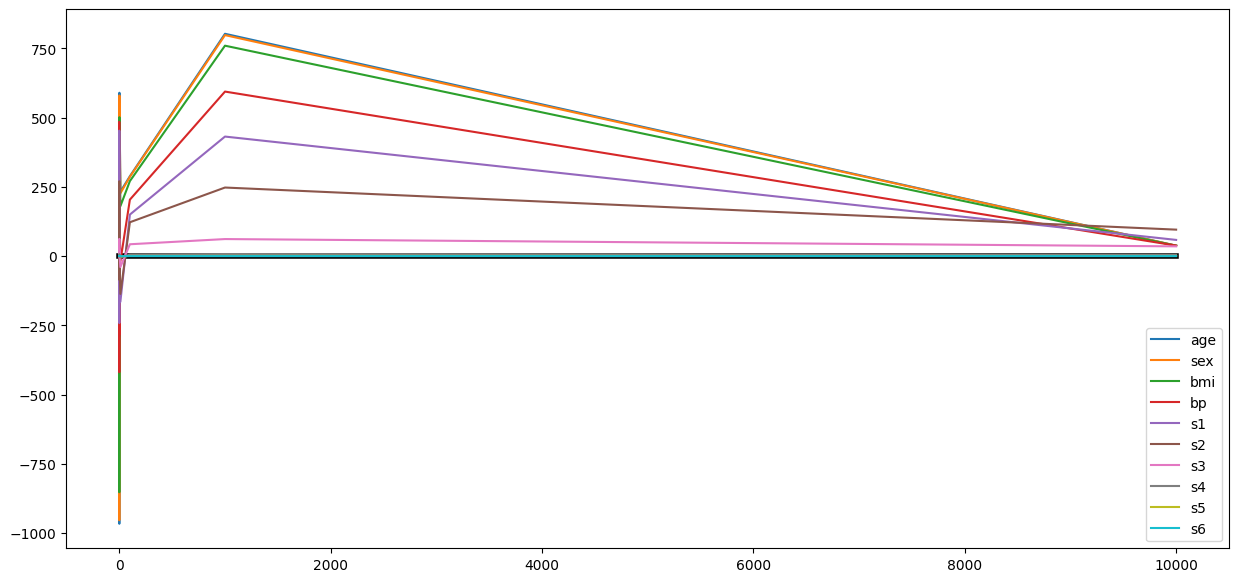

In [ ]:
from matplotlib import colors
plt.figure(figsize=(15,7))
plt.plot(alpha, np.zeros(len(codf)), color='black', linewidth=4)

for i in range(input_appar.shape[0]):
  plt.plot(alpha, input_appar[i],label=data.feature_names[i])
plt.legend()



**Effect by Bias variance**

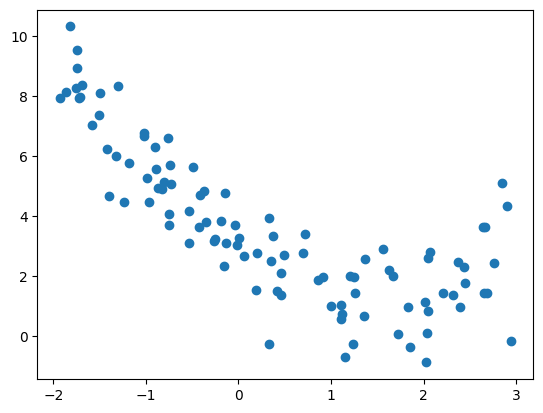

In [ ]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

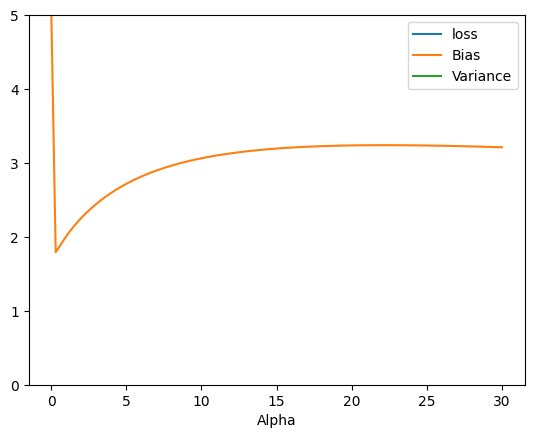

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

[27.82809103]
-2.29474455867698


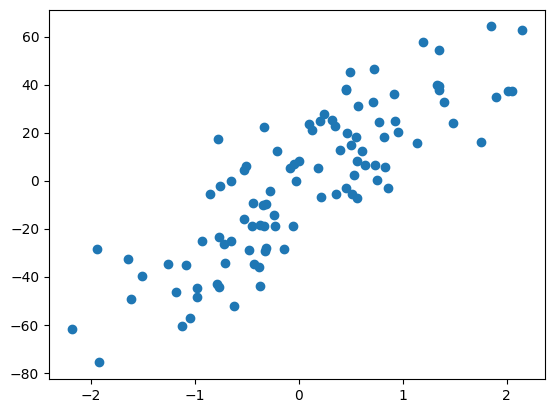

In [ ]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [ ]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m


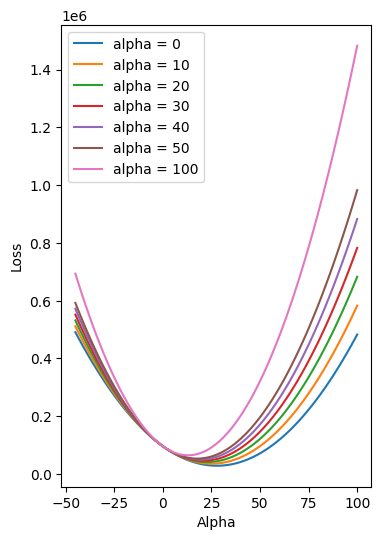

In [ ]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()
